<a href="https://colab.research.google.com/github/eljuanrv/Dragon_Ball_Data-Set/blob/main/Dragon_Ball_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dragon_Ball_Data-Set
---
**Español**

Este archivo consiste en todos los personajes de Dragon Ball, sus Niveles de Poder, la Saga o Pelicula y las Series a las que pertenecen, desde Dragon Ball a Dragon Ball Z: Battle of Gods.

Puedes encontrar el Dataset original en el siguiente enlace 
[Dragon_Ball_Data-Set](https://www.kaggle.com/shiddharthsaran/dragon-ball-dataset)

---
**English**

This file consists of all the Dragon Ball Characters, their Power Levels, the Saga or Movie and Series they are from, from Dragon Ball to Dragon Ball Z: Battle of Gods.

You can find the original Dataset in the following link 
[Dragon_Ball_Data-Set](https://www.kaggle.com/shiddharthsaran/dragon-ball-dataset)

Importamos las librerias más comunes.

- Pandas: Para manipular dataframes
- Numpy: Para manipular vectores facilmente

In [1]:
import pandas as pd
import numpy as np

Cargamos el dataframe y observamos las primeras filas

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/eljuanrv/Dragon_Ball_Data-Set/main/Dragon_Ball_Data_Set.csv')
df.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5,Emperor Pilaf Saga,Dragon Ball


Obtenemos la información del df y observamos que:
- Tenemos 4 columnas y todas son tipo object
- La columna **Power_Level** deberia ser numerica para poder realizar operaciones con estos datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1244 entries, 0 to 1243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Character           1244 non-null   object
 1   Power_Level         1244 non-null   object
 2   Saga_or_Movie       1244 non-null   object
 3   Dragon_Ball_Series  1244 non-null   object
dtypes: object(4)
memory usage: 39.0+ KB


## Limpieza

Vamos a convertir la columna **Power_Level** de tipo **object** a **int**

- Al ejecutar la siguiente linea de codigo podmos observar que no podemos convertir a **enteros** porque tenemos valores con **punto decimal (flotantes)**
- Por lo tanto debemos convertirla a **flotante (float)**

In [ ]:
df.Power_Level=df.apply(lambda fila: int(str(fila['Power_Level']).replace(',','')), axis='columns')

ValueError: ignored

Nuevamente tenemos un error pero esta vez es porque tenemos un registro que contiene una cadena de caracteres o **string** por lo tanto debemos encontrar este registro y modificarlo o eliminarlo

In [ ]:
df.Power_Level=df.apply(lambda fila: float(str(fila['Power_Level']).replace(',','')), axis='columns')

ValueError: ignored

Podemos observar que el registro corresponde al Androide numero 18 y al parecer su poder fue suprimido o reprimido luchando contra Trunks
- Podriamos simplemente cambiar el valor por 0 pero la mejor opcion en este caso es eliminar el registro

In [ ]:
df.loc[df.Power_Level == '(supressed, figting Trunks)']

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
1125,Android 18,"(supressed, figting Trunks)",Dragon Ball Z: History of Trunks,Dragon Ball Z


Eliminamos el registro utilizando el indice de la fila con el metodo drop()

In [3]:
df=df.drop(1125)

Nuevamente utilizamos la funcion para convertir la columna a nuemeros flotantes

In [4]:
df.Power_Level=df.apply(lambda fila: float(str(fila['Power_Level']).replace(',','')), axis='columns')

In [ ]:
Nuevamente utilizando el metodo .info() podemos observar que la transformación se realizó correctamente

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 1243
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Character           1243 non-null   object 
 1   Power_Level         1243 non-null   float64
 2   Saga_or_Movie       1243 non-null   object 
 3   Dragon_Ball_Series  1243 non-null   object 
dtypes: float64(1), object(3)
memory usage: 48.6+ KB


GROUPBY

Agrupamos por serie y despues por saga para obtener el nivel promedio de cada una

In [7]:
import numpy as np

In [ ]:
df.groupby(['Dragon_Ball_Series', 'Saga_or_Movie'])['Power_Level'].agg([np.mean,np.median])

In [16]:
df.pivot_table(values='Power_Level',columns='Dragon_Ball_Series',index='Saga_or_Movie',aggfunc=[np.mean,np.median],fill_value=0,margins=True)

mean  ...        median
Dragon_Ball_Series                                Dragon Ball  ...           All
Saga_or_Movie                                                  ...              
Android Saga                                         0.000000  ...  2.100000e+08
Babidi Saga/Majin Buu Saga                           0.000000  ...  3.325000e+10
Baby Saga                                            0.000000  ...  5.000000e+11
Black-Star Dragon Ball Saga                          0.000000  ...  2.400000e+07
Captain Ginyu Saga                                   0.000000  ...  6.350000e+04
Cell Games Saga                                      0.000000  ...  1.225000e+10
Dragon Ball GT: A Hero's Legacy                      0.000000  ...  1.500000e+01
Dragon Ball Z: Bardock-Father of Goku                0.000000  ...  1.100000e+04
Dragon Ball Z: History of Trunks                     0.000000  ...  6.000000e+06
Dragon Ball: Episode of Bardock                      0.000000  ...  2.900000e+05
Dragon Ball: Yo! Son Goku and His Friends Return     0.000000  ...  3.960000e+07
Emperor Pilaf Saga                                  35.500000  ...  9.250000e+00
Fortune Teller Baba Saga                            68.750000  ...  7.150000e+01
Frieza Saga                                          0.000000  ...  1.500000e+06
Fusion Saga                                          0.000000  ...  5.000000e+10
Ginyu Force Saga                                     0.000000  ...  2.650000e+04
Goku And Gohan in The Hyperbolic Time Chamber        0.000000  ...  4.250000e+08
Great Saiyaman Saga/World Tournament Saga            0.000000  ...  3.600000e+08
Imperfect Cell Saga                                  0.000000  ...  7.600000e+08
Kid Buu Saga                                         0.000000  ...  1.291250e+11
King Piccolo Saga                                  221.280000  ...  1.800000e+02
Movie 10: Broly- The Second Coming                   0.000000  ...  1.650000e+09
Movie 11: Bio-Broly                                  0.000000  ...  5.000000e+08
Movie 12: Fusion Reborn                              0.000000  ...  2.200000e+09
Movie 13: Wrath of the Dragon                        0.000000  ...  2.800000e+09
Movie 14: Battle of Gods                             0.000000  ...  2.600000e+11
Movie 1: Dead Zone                                   0.000000  ...  2.825000e+02
Movie 2: World's Strongest                           0.000000  ...  8.300000e+03
Movie 3: The Tree of Might                           0.000000  ...  1.000000e+05
Movie 4: Lord Slug                                   0.000000  ...  1.350000e+06
Movie 5: Cooler's Revenge                            0.000000  ...  1.200000e+07
Movie 6: The Return of Cooler                        0.000000  ...  4.000000e+08
Movie 7: Super Android 13                            0.000000  ...  5.750000e+08
Movie 8: Broly - The Legendary Super Saiyan          0.000000  ...  3.450000e+08
Movie 9: Bojack Unbound                              0.000000  ...  8.550000e+08
Namek Saga                                           0.000000  ...  1.350000e+04
OVA: Plan to Eradicate the Super Saiyans             0.000000  ...  4.000000e+08
Perfect Cell Saga                                    0.000000  ...  3.273750e+09
Piccolo Jr. Saga                                   240.857143  ...  2.025000e+02
Red Ribbon Army Saga                                63.190476  ...  5.500000e+01
Saiyan Saga                                          0.000000  ...  1.410000e+03
Shadow Dragon Saga                                   0.000000  ...  4.000000e+11
Super 17 saga                                        0.000000  ...  4.750000e+10
Tien Shinhan Saga                                  193.714286  ...  1.390000e+02
Tournament Saga                                     82.684211  ...  2.800000e+01
Trunks Saga                                          0.000000  ...  6.000000e+06
All                                                135.313043  ...  1.960000e+07

[47 ro

## Visualización

Para visualizar nuestros datos utilizaremos matplotlib una poderosa herramienta para visualizacion de datos

In [ ]:
import matplotlib.pyplot as plt


Nuevamente visualizamos nuestros primeros registros

In [ ]:
df.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Goku,10.0,Emperor Pilaf Saga,Dragon Ball
1,Bulma,1.5,Emperor Pilaf Saga,Dragon Ball
2,Bear Thief,7.0,Emperor Pilaf Saga,Dragon Ball
3,Master Roshi,30.0,Emperor Pilaf Saga,Dragon Ball
4,Oolong,5.0,Emperor Pilaf Saga,Dragon Ball


Ahora vamos a ver cuantas series tenemos en el Dataset porque yo solo he visto algunas y no voy a trabajar con todas

- Tenemos 3 series 
- Dragon Ball Z tiene 919 registros por lo tanto vamos a comenzar con esta

In [ ]:
df.Dragon_Ball_Series.unique()

array(['Dragon Ball', 'Dragon Ball Z', 'Dragon Ball GT'], dtype=object)

In [ ]:
df.Dragon_Ball_Series.value_counts(sort=True)

Dragon Ball Z     919
Dragon Ball GT    209
Dragon Ball       115
Name: Dragon_Ball_Series, dtype: int64

## Dragon Ball Z

Creamos un nuevo Dataframe unicamente con los registros de Dragon Ball Z

In [ ]:
df_Z=df.loc[df.Dragon_Ball_Series == 'Dragon Ball Z']

Observamos los primeros registros y una buena opcion es reiniciar el indice para que comience en 0

In [ ]:
df_Z.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
115,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
116,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
117,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
118,Gohan,1.0,Saiyan Saga,Dragon Ball Z
119,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z


In [ ]:
df_Z=df_Z.reset_index(drop=True)
df_Z.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z


Ahora vamos a ver las Sagas o Peliculas de nuestro Dataframe

In [ ]:
df_Z.Saga_or_Movie.value_counts(sort=True)

Saiyan Saga                                          68
Kid Buu Saga                                         50
Great Saiyaman Saga/World Tournament Saga            47
Cell Games Saga                                      45
Frieza Saga                                          44
Movie 14: Battle of Gods                             42
Fusion Saga                                          41
Dragon Ball: Yo! Son Goku and His Friends Return     38
Dragon Ball Z: History of Trunks                     33
Movie 9: Bojack Unbound                              30
Movie 8: Broly - The Legendary Super Saiyan          30
Movie 2: World's Strongest                           29
Android Saga                                         29
Movie 12: Fusion Reborn                              28
Dragon Ball Z: Bardock-Father of Goku                26
OVA: Plan to Eradicate the Super Saiyans             25
Movie 13: Wrath of the Dragon                        23
Movie 5: Cooler's Revenge                       

Voy a filtrar solamente las sagas que he visto que son las siguientes

- Saiyan Saga                                         
- Kid Buu Saga                                         
- Great Saiyaman Saga/World Tournament Saga            
- Cell Games Saga                                      
- Frieza Saga                                          
- Movie 14: Battle of Gods                             
- Fusion Saga                                          
- Dragon Ball Z: History of Trunks                     
- Android Saga                                         
- Trunks Saga                                          
- Perfect Cell Saga                                    
- Namek Saga                                           
- Babidi Saga/Majin Buu Saga                           
- Imperfect Cell Saga                                   


Ordenadas Cronologicamente
--- 
1. Saiyan Saga
2. Namek Saga
3. Frieza Saga
4. Trunks Saga
5. Android Saga
6. Dragon Ball Z: History of Trunks
7. Imperfect Cell Saga
8. Perfect Cell Saga
9. Cell Games Saga
10. Great Saiyaman Saga/World Tournament Saga
11. Babidi Saga/Majin Buu Saga
12. Fusion Saga
13. Kid Buu Saga
14. Movie 14: Battle of Gods


In [ ]:
series=['Saiyan Saga','Namek Saga','Frieza Saga','Trunks Saga','Android Saga','Dragon Ball Z: History of Trunks','Imperfect Cell Saga','Perfect Cell Saga','Cell Games Saga','Great Saiyaman Saga/World Tournament Saga','Babidi Saga/Majin Buu Saga','Fusion Saga','Kid Buu Saga','Movie 14: Battle of Gods']

In [ ]:
df_Z_filter=df_Z.loc[df_Z.Saga_or_Movie.isin(series)]
df_Z_filter.Saga_or_Movie.value_counts(sort=True)

Saiyan Saga                                  68
Kid Buu Saga                                 50
Great Saiyaman Saga/World Tournament Saga    47
Cell Games Saga                              45
Frieza Saga                                  44
Movie 14: Battle of Gods                     42
Fusion Saga                                  41
Dragon Ball Z: History of Trunks             33
Android Saga                                 29
Trunks Saga                                  20
Babidi Saga/Majin Buu Saga                   18
Namek Saga                                   18
Perfect Cell Saga                            18
Imperfect Cell Saga                           8
Name: Saga_or_Movie, dtype: int64

In [ ]:
df_Z_filter.Saga_or_Movie.unique()

array(['Saiyan Saga', 'Namek Saga', 'Frieza Saga', 'Trunks Saga',
       'Android Saga', 'Imperfect Cell Saga', 'Perfect Cell Saga',
       'Cell Games Saga', 'Great Saiyaman Saga/World Tournament Saga',
       'Babidi Saga/Majin Buu Saga', 'Fusion Saga', 'Kid Buu Saga',
       'Dragon Ball Z: History of Trunks', 'Movie 14: Battle of Gods'],
      dtype=object)

Ya obtuvimos solamente los registros que nos interesaban pero ahora debemos ordenarlos cronologicamente

In [ ]:
numeros=[]

In [ ]:
for indice,nombre in enumerate(df_Z_filter.Saga_or_Movie):
  numeros.append(series.index(nombre))

In [ ]:
numeros

In [ ]:
df_Z_filter['orden']=numeros[:]

In [ ]:
df_Z_filter.head()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,orden
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z,0
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z,0
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z,0
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z,0
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z,0


In [ ]:
df_Z_ordered=df_Z_filter.sort_values('orden').reset_index(drop=True)

In [ ]:
df_Z_ordered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Character           481 non-null    object 
 1   Power_Level         481 non-null    float64
 2   Saga_or_Movie       481 non-null    object 
 3   Dragon_Ball_Series  481 non-null    object 
 4   orden               481 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 18.9+ KB


In [ ]:
df_Z_ordered.tail(50)

Ahora ya tenemos ordenado cronologicamente nuestro Dataset ahora voy a descansar

In [ ]:
a='perro pedro'

In [ ]:
goku=[]

In [ ]:
for indice, nombre in enumerate(df_Z_ordered.Character):
  if str(nombre).find('Goku') != -1:
    goku.append(indice)

In [ ]:
df_goku=df_Z_ordered.iloc[goku]
df_goku.tail()

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,orden
457,"Goku (MSSJ, energy gathered)",2.000000e+12,Movie 14: Battle of Gods,Dragon Ball Z,13
464,Goku,1.120000e+10,Movie 14: Battle of Gods,Dragon Ball Z,13
470,Goku (MSSJ),5.600000e+11,Movie 14: Battle of Gods,Dragon Ball Z,13
471,Goku (SSJ3),4.480000e+12,Movie 14: Battle of Gods,Dragon Ball Z,13
479,Goku (SSJ2),1.120000e+12,Movie 14: Battle of Gods,Dragon Ball Z,13


In [ ]:
df_goku.sort_values('Power_Level',ascending=False)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,orden
455,Goku (SSJG),2.240000e+14,Movie 14: Battle of Gods,Dragon Ball Z,13
451,"Goku (SSJG, full power)",2.240000e+14,Movie 14: Battle of Gods,Dragon Ball Z,13
449,"Goku (SSJG, 80%)",1.950000e+14,Movie 14: Battle of Gods,Dragon Ball Z,13
454,Goku (MSSJ with SSJG's power),2.240000e+13,Movie 14: Battle of Gods,Dragon Ball Z,13
428,Goku (SSJ3),1.120000e+13,Kid Buu Saga,Dragon Ball Z,12
...,...,...,...,...,...
48,Goku's Kamehameha,9.500000e+02,Saiyan Saga,Dragon Ball Z,0
28,Goku (legs crushed),7.500000e+02,Saiyan Saga,Dragon Ball Z,0
47,Goku,4.160000e+02,Saiyan Saga,Dragon Ball Z,0
41,Goku (weighted),3.340000e+02,Saiyan Saga,Dragon Ball Z,0


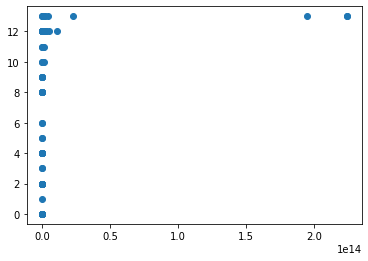

In [ ]:
plt.scatter(df_goku.Power_Level,df_goku.orden)
plt.show()

Se puede observar que el poder que alcanzó Goku en la pelicula de la batalla de los dioses es demasiado alto comparado con el que obtuvo en la saga por lo tanto voy a eliminar tambien la batalla de los dioses

In [ ]:
df_goku=df_goku.loc[df_goku.Saga_or_Movie != 'Movie 14: Battle of Gods']

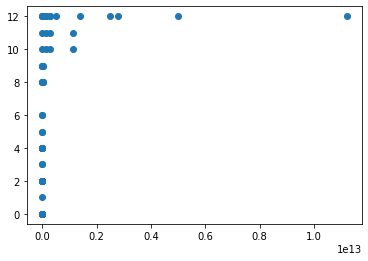

In [ ]:
plt.scatter(df_goku.Power_Level,df_goku.orden)
plt.show()

In [ ]:
df_goku.sort_values('Power_Level',ascending=False)

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series,orden
428,Goku (SSJ3),1.120000e+13,Kid Buu Saga,Dragon Ball Z,12
435,Goku's Spirit Bomb,5.000000e+12,Kid Buu Saga,Dragon Ball Z,12
437,Goku (SSJ2),2.800000e+12,Kid Buu Saga,Dragon Ball Z,12
416,Goku's True Kamehameha,2.500000e+12,Kid Buu Saga,Dragon Ball Z,12
431,Goku (MSSJ),1.400000e+12,Kid Buu Saga,Dragon Ball Z,12
...,...,...,...,...,...
48,Goku's Kamehameha,9.500000e+02,Saiyan Saga,Dragon Ball Z,0
28,Goku (legs crushed),7.500000e+02,Saiyan Saga,Dragon Ball Z,0
47,Goku,4.160000e+02,Saiyan Saga,Dragon Ball Z,0
41,Goku (weighted),3.340000e+02,Saiyan Saga,Dragon Ball Z,0


Saiyan Saga

In [ ]:
Saiyan_Saga=df_Z.loc[df_Z.Saga_or_Movie == 'Saiyan Saga']

In [ ]:
Saiyan_Saga

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
115,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
116,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
117,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
118,Gohan,1.0,Saiyan Saga,Dragon Ball Z
119,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z
...,...,...,...,...
178,Vegeta (weakened),1900.0,Saiyan Saga,Dragon Ball Z
179,Krillin (weakened),600.0,Saiyan Saga,Dragon Ball Z
180,Gohan (weakened),420.0,Saiyan Saga,Dragon Ball Z
181,Gohan (Great Ape),10000.0,Saiyan Saga,Dragon Ball Z


In [ ]:
Saiyan_Saga.reset_index(inplace=True, drop=True)

In [ ]:
Saiyan_Saga

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
0,Farmer (without shotgun),2.0,Saiyan Saga,Dragon Ball Z
1,Farmer (with shotgun),5.0,Saiyan Saga,Dragon Ball Z
2,Raditz,1200.0,Saiyan Saga,Dragon Ball Z
3,Gohan,1.0,Saiyan Saga,Dragon Ball Z
4,Piccolo (weighted),326.0,Saiyan Saga,Dragon Ball Z
...,...,...,...,...
63,Vegeta (weakened),1900.0,Saiyan Saga,Dragon Ball Z
64,Krillin (weakened),600.0,Saiyan Saga,Dragon Ball Z
65,Gohan (weakened),420.0,Saiyan Saga,Dragon Ball Z
66,Gohan (Great Ape),10000.0,Saiyan Saga,Dragon Ball Z


In [ ]:
Saiyan_Saga.sort_values('Power_Level', ascending=False).head(50)

In [ ]:
Saiyan_Saga.loc[Saiyan_Saga.Character == 'Yajirobe']

,Character,Power_Level,Saga_or_Movie,Dragon_Ball_Series
20,Yajirobe,150.0,Saiyan Saga,Dragon Ball Z
49,Yajirobe,910.0,Saiyan Saga,Dragon Ball Z


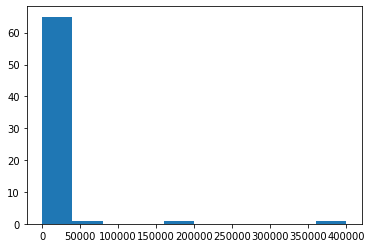

In [ ]:
plt.hist(Saiyan_Saga.Power_Level, bins=10)
plt.show()